# Basic Import

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.decomposition import PCA
import matplotlib.pylab as plt

import matplotlib.cm as cm

# Data Preprocessing

In [2]:
# load the data from csv file
df_fund = pd.read_csv(r"Fundamental_features.csv",index_col=0)
df_tech = pd.read_csv("Tech_Features.csv",index_col=['Unnamed: 0'],parse_dates={'tstamp':['date']}, keep_date_col=True)
df_tech = df_tech.drop(columns='date').rename(columns={'tstamp':'date'})

## Technical Part

In [3]:
df_tech.head()

,date,ticker,close_price,open_price,high,low,volume
0,2015-06-01,A,39.344406,41.430000,41.430000,40.849998,2440000.0
1,2015-06-02,A,39.527092,40.939999,41.139999,40.669998,2947500.0
2,2015-06-03,A,39.517475,41.310001,41.360001,40.939999,2722100.0
3,2015-06-04,A,38.979042,40.889999,41.080002,40.009998,4091900.0
4,2015-06-05,A,38.757900,40.540001,40.669998,40.200001,1760300.0


### Check the technical data

In [4]:
df_tech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497679 entries, 0 to 497678
Data columns (total 7 columns):
date           497679 non-null datetime64[ns]
ticker         497679 non-null object
close_price    497057 non-null float64
open_price     497057 non-null float64
high           497057 non-null float64
low            497057 non-null float64
volume         497057 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 30.4+ MB


Find the tickers with missing dates

In [128]:
rst = df_tech.groupby('ticker')['date'].count()
for i in range(len(rst)):
    if rst[i]!= 1008:
        print(i, rst[i])

62 396
91 396
113 396
123 5
133 395
143 51
168 395
169 395
198 732
222 395
229 910
260 396
269 984
284 396
294 641
353 396
375 395
376 396
385 984
450 986
468 396
488 991
500 396
502 3024


In [5]:
df_tech[df_tech.close_price.isnull()].groupby("ticker").count()

,date,close_price,open_price,high,low,volume
ticker,,,,,,
BBT,37,0,0,0,0,0
CF,37,0,0,0,0,0
COTY,37,0,0,0,0,0
DGX,37,0,0,0,0,0
EVRG,37,0,0,0,0,0
EW,37,0,0,0,0,0
HIG,37,0,0,0,0,0
JEF,37,0,0,0,0,0
LIN,136,0,0,0,0,0


Fill the missing value with the value from last observation

In [6]:
df_tech = df_tech.fillna(method='ffill')

In [7]:
df_tech.head()

,date,ticker,close_price,open_price,high,low,volume
0,2015-06-01,A,39.344406,41.430000,41.430000,40.849998,2440000.0
1,2015-06-02,A,39.527092,40.939999,41.139999,40.669998,2947500.0
2,2015-06-03,A,39.517475,41.310001,41.360001,40.939999,2722100.0
3,2015-06-04,A,38.979042,40.889999,41.080002,40.009998,4091900.0
4,2015-06-05,A,38.757900,40.540001,40.669998,40.200001,1760300.0


In [81]:
df_tech[df_tech['ticker']=='A'].close_price.count()

1008

In [8]:
df_tech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497679 entries, 0 to 497678
Data columns (total 7 columns):
date           497679 non-null datetime64[ns]
ticker         497679 non-null object
close_price    497679 non-null float64
open_price     497679 non-null float64
high           497679 non-null float64
low            497679 non-null float64
volume         497679 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 30.4+ MB


In [73]:
df_test = df_tech.set_index(['ticker','date'])
df_test.head()

close_price  open_price       high        low     volume
ticker date                                                                
A      2015-06-01    39.344406   41.430000  41.430000  40.849998  2440000.0
       2015-06-02    39.527092   40.939999  41.139999  40.669998  2947500.0
       2015-06-03    39.517475   41.310001  41.360001  40.939999  2722100.0
       2015-06-04    38.979042   40.889999  41.080002  40.009998  4091900.0
       2015-06-05    38.757900   40.540001  40.669998  40.200001  1760300.0

In [60]:
test_t['A'][:1]

date,2015-06-01 00:00:00,2015-06-02 00:00:00,2015-06-03 00:00:00,2015-06-04 00:00:00,2015-06-05 00:00:00,2015-06-08 00:00:00,2015-06-09 00:00:00,2015-06-10 00:00:00,2015-06-11 00:00:00,2015-06-12 00:00:00,...,2019-05-17 00:00:00,2019-05-20 00:00:00,2019-05-21 00:00:00,2019-05-22 00:00:00,2019-05-23 00:00:00,2019-05-24 00:00:00,2019-05-28 00:00:00,2019-05-29 00:00:00,2019-05-30 00:00:00,2019-05-31 00:00:00
close_price,39.344406,39.527092,39.517475,38.979042,38.7579,38.411762,38.575214,38.959816,38.969421,38.305992,...,69.110001,68.93,68.32,67.970001,67.699997,68.360001,67.080002,67.300003,66.889999,67.050003


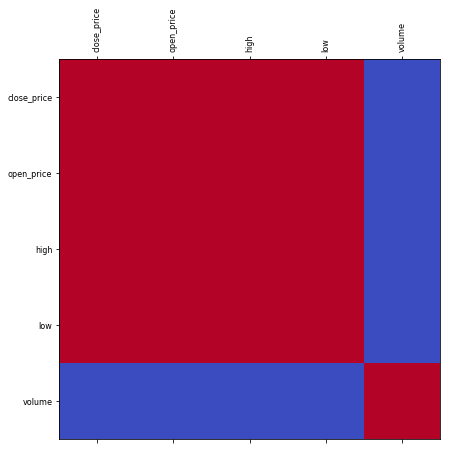

In [10]:
%matplotlib inline

tech_corr = df_tech.corr()
size = 7
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(tech_corr,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(tech_corr.columns)), tech_corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(tech_corr.columns)), tech_corr.columns, fontsize=8);

### Check the fundamental data

In [13]:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 502
Data columns (total 57 columns):
Ticker                          503 non-null object
annualHoldingsTurnover          0 non-null float64
enterpriseToRevenue             500 non-null float64
beta3Year                       0 non-null float64
profitMargins                   502 non-null float64
enterpriseToEbitda              468 non-null float64
52WeekChange                    502 non-null object
morningStarRiskRating           0 non-null float64
forwardEps                      500 non-null float64
revenueQuarterlyGrowth          0 non-null float64
sharesOutstanding               502 non-null float64
fundInceptionDate               502 non-null object
annualReportExpenseRatio        0 non-null float64
totalAssets                     0 non-null float64
bookValue                       500 non-null float64
sharesShort                     501 non-null float64
sharesPercentSharesOut          501 non-null float64
fundFamil

In [14]:
df_fund.describe()

,annualHoldingsTurnover,enterpriseToRevenue,beta3Year,profitMargins,enterpriseToEbitda,morningStarRiskRating,forwardEps,revenueQuarterlyGrowth,sharesOutstanding,annualReportExpenseRatio,...,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,category,fiveYearAverageReturn,eps,Market Cap,PE,NI,EBIT
count,0.0,500.000000,0.0,502.000000,468.000000,0.0,500.000000,0.0,5.020000e+02,0.0,...,0.0,492.000000,5.010000e+02,0.0,0.0,475.000000,5.030000e+02,475.000000,4.950000e+02,4.950000e+02
mean,NaN,4.353184,NaN,0.141913,15.921844,NaN,7.026480,NaN,5.839823e+08,NaN,...,NaN,0.038569,1.190375e+07,NaN,NaN,5.600072,5.133246e+10,46.978663,2.381375e+09,3.073462e+09
std,NaN,3.937997,NaN,0.137798,12.529259,NaN,8.103165,NaN,1.010853e+09,NaN,...,NaN,0.043145,1.579711e+07,NaN,NaN,6.772914,1.015141e+11,234.462306,5.103747e+09,5.605709e+09
min,NaN,-6.688000,NaN,-0.834840,1.865000,NaN,-2.690000,NaN,2.452870e+07,NaN,...,NaN,0.004700,6.957810e+05,NaN,NaN,0.010000,4.617153e+09,2.987453,-2.235500e+10,-2.135400e+08
25%,NaN,1.709750,NaN,0.066185,9.496750,NaN,3.095000,NaN,1.559502e+08,NaN,...,NaN,0.014775,3.733449e+06,NaN,NaN,2.475500,1.262995e+10,13.399577,4.690490e+08,7.062385e+08
50%,NaN,3.348500,NaN,0.120765,13.395500,NaN,5.140000,NaN,2.973550e+08,NaN,...,NaN,0.024050,6.819353e+06,NaN,NaN,4.060000,2.272020e+10,20.849548,1.049000e+09,1.433000e+09
75%,NaN,5.297250,NaN,0.210530,18.780500,NaN,8.295000,NaN,5.434483e+08,NaN,...,NaN,0.044825,1.397679e+07,NaN,NaN,6.458000,4.616475e+10,34.146515,2.384200e+09,3.117000e+09
max,NaN,21.689000,NaN,0.903610,194.515000,NaN,113.580000,NaN,9.508200e+09,NaN,...,NaN,0.463100,1.489338e+08,NaN,NaN,88.292005,1.016090e+12,4400.000000,5.953100e+10,7.089800e+10


In [15]:
df_fund.tail()

,Ticker,annualHoldingsTurnover,enterpriseToRevenue,beta3Year,profitMargins,enterpriseToEbitda,52WeekChange,morningStarRiskRating,forwardEps,revenueQuarterlyGrowth,...,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,category,fiveYearAverageReturn,eps,Market Cap,PE,NI,EBIT
498,ZBH,NaN,4.034,NaN,-0.03901,12.904,0.0570879,NaN,8.29,NaN,...,NaN,0.0134,2729726.0,NaN,NaN,NaN,2.492596e+10,NaN,-3.792000e+08,1.487000e+09
499,ZION,NaN,4.684,NaN,0.30602,NaN,-0.22856641,NaN,4.79,NaN,...,NaN,0.1660,25164020.0,NaN,NaN,4.027,8.003649e+09,10.886517,8.840000e+08,0.000000e+00
500,ZTS,NaN,9.721,NaN,0.23470,26.360,0.26418567,NaN,3.87,NaN,...,NaN,0.0097,5694570.0,NaN,NaN,2.860,5.275746e+10,38.538464,1.428000e+09,1.891000e+09
501,ZTS,NaN,9.721,NaN,0.23470,26.360,0.26418567,NaN,3.87,NaN,...,NaN,0.0097,5694570.0,NaN,NaN,2.860,5.275746e+10,38.538464,1.428000e+09,1.891000e+09
502,ZTS,NaN,9.721,NaN,0.23470,26.360,0.26418567,NaN,3.87,NaN,...,NaN,0.0097,5694570.0,NaN,NaN,2.860,5.275746e+10,38.538464,1.428000e+09,1.891000e+09


In [16]:
# drop empty columns
filtered_fund = df_fund.dropna(axis='columns', how='all')
filtered_fund = filtered_fund[:-2]

In [17]:
filtered_fund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 40 columns):
Ticker                          501 non-null object
enterpriseToRevenue             498 non-null float64
profitMargins                   500 non-null float64
enterpriseToEbitda              466 non-null float64
52WeekChange                    500 non-null object
forwardEps                      498 non-null float64
sharesOutstanding               500 non-null float64
fundInceptionDate               500 non-null object
bookValue                       498 non-null float64
sharesShort                     499 non-null float64
sharesPercentSharesOut          499 non-null float64
lastFiscalYearEnd               500 non-null float64
heldPercentInstitutions         499 non-null float64
netIncomeToCommon               500 non-null float64
trailingEps                     498 non-null float64
SandP52WeekChange               500 non-null float64
priceToBook                     473 non-null float

In [18]:
filtered_fund.enterpriseToRevenue.std()

3.9311334239685234

In [19]:
filtered_fund.tail()

,Ticker,enterpriseToRevenue,profitMargins,enterpriseToEbitda,52WeekChange,forwardEps,sharesOutstanding,fundInceptionDate,bookValue,sharesShort,...,pegRatio,forwardPE,maxAge,shortPercentOfFloat,sharesShortPriorMonth,eps,Market Cap,PE,NI,EBIT
496,XYL,3.186,0.10503,17.756,0.10776937,3.72,179932992.0,-,15.542,4044471.0,...,1.51,21.607527,1.0,0.0253,4537414.0,3.030,1.446301e+10,26.528051,5.490000e+08,6.920000e+08
497,YUM,7.887,0.24610,23.173,0.31235707,4.25,305975008.0,-,-25.830,5141976.0,...,1.63,25.564707,1.0,0.0168,4488679.0,4.253,3.324418e+10,25.546675,1.542000e+09,1.762000e+09
498,ZBH,4.034,-0.03901,12.904,0.0570879,8.29,204798000.0,-,56.320,2744661.0,...,3.50,14.681544,1.0,0.0134,2729726.0,NaN,2.492596e+10,NaN,-3.792000e+08,1.487000e+09
499,ZION,4.684,0.30602,NaN,-0.22856641,4.79,182564992.0,-,38.474,26102899.0,...,1.43,9.152401,1.0,0.1660,25164020.0,4.027,8.003649e+09,10.886517,8.840000e+08,0.000000e+00
500,ZTS,9.721,0.23470,26.360,0.26418567,3.87,478656000.0,-,4.837,4660691.0,...,2.52,28.480621,1.0,0.0097,5694570.0,2.860,5.275746e+10,38.538464,1.428000e+09,1.891000e+09


In [20]:
filtered_fund = filtered_fund.drop(['fundInceptionDate','sharesShortPreviousMonthDate', 'lastSplitDate', 'lastSplitFactor','priceHint', 'dateShortInterest', 'maxAge'], axis=1)

In [21]:
filtered_fund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 33 columns):
Ticker                     501 non-null object
enterpriseToRevenue        498 non-null float64
profitMargins              500 non-null float64
enterpriseToEbitda         466 non-null float64
52WeekChange               500 non-null object
forwardEps                 498 non-null float64
sharesOutstanding          500 non-null float64
bookValue                  498 non-null float64
sharesShort                499 non-null float64
sharesPercentSharesOut     499 non-null float64
lastFiscalYearEnd          500 non-null float64
heldPercentInstitutions    499 non-null float64
netIncomeToCommon          500 non-null float64
trailingEps                498 non-null float64
SandP52WeekChange          500 non-null float64
priceToBook                473 non-null float64
heldPercentInsiders        499 non-null float64
nextFiscalYearEnd          500 non-null float64
mostRecentQuarter          500 no

In [22]:
filtered_fund.index = filtered_fund['Ticker']
filtered_fund = filtered_fund.drop(['Ticker'],axis=1)

In [23]:
filtered_fund.head()

,enterpriseToRevenue,profitMargins,enterpriseToEbitda,52WeekChange,forwardEps,sharesOutstanding,bookValue,sharesShort,sharesPercentSharesOut,lastFiscalYearEnd,...,earningsQuarterlyGrowth,pegRatio,forwardPE,shortPercentOfFloat,sharesShortPriorMonth,eps,Market Cap,PE,NI,EBIT
Ticker,,,,,,,,,,,,,,,,,,,,,
A,4.306,0.22255,17.757,0.051262617,3.40,3.159930e+08,16.153,4636334.0,0.0146,1.540944e+09,...,-0.112,2.30,20.673529,0.0146,3687978.0,3.443000,2.221115e+10,20.415335,3.160000e+08,9.740000e+08
AAL,0.958,0.03215,7.364,-0.2998188,5.76,4.448350e+08,-1.432,20867364.0,0.0469,1.546214e+09,...,0.164,0.41,5.340278,0.0561,23003563.0,3.118000,1.368313e+10,9.865298,1.412000e+09,3.757000e+09
AAP,1.428,0.04448,14.394,0.17042124,9.49,7.132690e+07,49.732,2867611.0,0.0400,1.546042e+09,...,0.042,1.09,16.177029,0.0471,2882176.0,5.856000,1.095011e+10,26.215847,4.238470e+08,7.121420e+08
AAPL,3.511,0.22117,11.732,-0.0056476593,12.78,4.601080e+09,22.977,49550348.0,0.0108,1.538179e+09,...,-0.164,1.37,15.068858,0.0105,61003851.0,11.887001,8.860759e+11,16.200891,5.953100e+10,7.089800e+10
ABBV,4.507,0.16418,10.552,-0.22391498,9.42,1.478330e+09,-5.294,21309313.0,0.0144,1.546214e+09,...,-0.117,1.16,8.168790,0.0163,27575807.0,3.511000,1.137575e+11,21.916832,5.687000e+09,1.191100e+10


In [24]:
filtered_fund = filtered_fund.replace([np.inf, -np.inf,"infinity","Infinity"], np.nan)

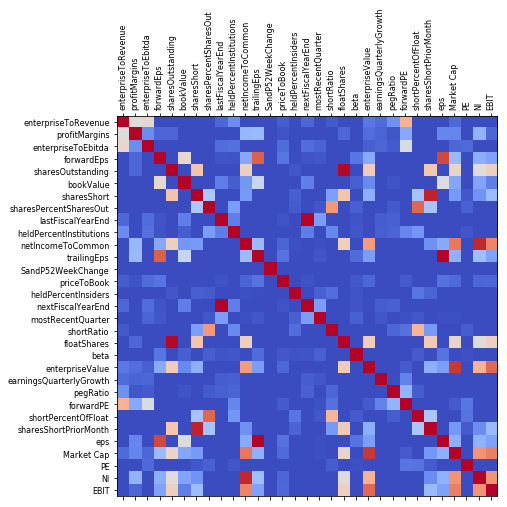

In [25]:
fund_corr = filtered_fund.corr()
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(fund_corr,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(fund_corr.columns)), fund_corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(fund_corr.columns)), fund_corr.columns, fontsize=8);

In [26]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):                            
        return X[self.attribute_names].values

fund_param = filtered_fund.columns

fund_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(fund_param)), #set the parameter for DataDrameSelector
        ("imputer", SimpleImputer(strategy="mean")), 
        ("StandardScaler", StandardScaler(copy=True, with_mean=True, with_std=True))
               
    ])

In [27]:
df_f_train = fund_pipeline.fit_transform(filtered_fund)

In [28]:
pca_f = PCA(random_state=100)
_ = pca_f.fit(df_f_train)

In [29]:
acc_va_ratio = np.cumsum(pca_f.explained_variance_ratio_)

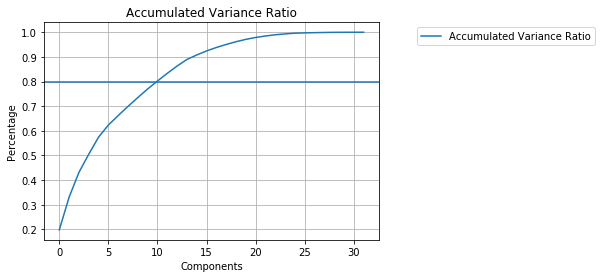

In [30]:
ba_bid_ask=plt.figure()
plt.plot(acc_va_ratio)
plt.legend(["Accumulated Variance Ratio"],bbox_to_anchor=(1.1,1))
plt.grid()
plt.title("Accumulated Variance Ratio")
plt.xlabel('Components')
plt.ylabel('Percentage')
plt.axhline(y=0.8)
_ = plt.show()

In [31]:
x_fund = pca_f.transform(df_f_train)
x_fund = pd.DataFrame(x_fund)
x_fund.columns = [ "{}th component".format(i+1) for i in range(32)]
x_fund.index = filtered_fund.index

x_fund.head()

,1th component,2th component,3th component,4th component,5th component,6th component,7th component,8th component,9th component,10th component,...,23th component,24th component,25th component,26th component,27th component,28th component,29th component,30th component,31th component,32th component
Ticker,,,,,,,,,,,,,,,,,,,,,
A,-0.692358,0.527520,-0.728757,-1.050745,0.718977,-0.291996,0.751895,0.164235,0.565963,-0.608714,...,-0.078416,-0.050233,0.050585,0.044261,0.010172,0.064656,0.015094,-0.005992,0.025388,1.147491e-15
AAL,-0.100462,-1.860838,2.446526,-1.574362,0.849633,3.813403,0.864427,-0.487914,0.713423,0.247365,...,0.056883,-0.097209,-0.118377,-0.061084,0.028689,-0.179959,0.055894,-0.013984,-0.059730,-3.276002e-16
AAP,-1.281207,0.933976,0.671220,-0.237379,-0.721203,-0.457094,-0.736277,0.202574,0.573841,-0.349082,...,-0.107768,-0.306282,0.010763,-0.063926,-0.045052,-0.023406,-0.008131,-0.004776,0.018826,4.130617e-16
AAPL,21.978544,-2.771887,-0.189469,3.330594,-0.613900,-1.827023,-0.848476,-6.009505,2.243356,-2.840963,...,-1.393245,-0.433629,0.018303,0.322328,-0.375021,-0.241288,0.218542,0.011334,0.028465,-3.995633e-15
ABBV,2.419956,-1.266063,0.171408,-0.731377,-0.557858,-0.193446,0.256886,-0.028821,-0.208940,-0.314357,...,-0.186182,0.219609,-0.633424,0.062953,-0.082265,-0.290037,0.028688,-0.000753,-0.042369,-4.518672e-16


In [32]:
pca_fund = x_fund.drop(["{}th component".format(i) for i in range(11,32)],axis = 1)

In [33]:
pca_fund.head()

,1th component,2th component,3th component,4th component,5th component,6th component,7th component,8th component,9th component,10th component,32th component
Ticker,,,,,,,,,,,
A,-0.692358,0.527520,-0.728757,-1.050745,0.718977,-0.291996,0.751895,0.164235,0.565963,-0.608714,1.147491e-15
AAL,-0.100462,-1.860838,2.446526,-1.574362,0.849633,3.813403,0.864427,-0.487914,0.713423,0.247365,-3.276002e-16
AAP,-1.281207,0.933976,0.671220,-0.237379,-0.721203,-0.457094,-0.736277,0.202574,0.573841,-0.349082,4.130617e-16
AAPL,21.978544,-2.771887,-0.189469,3.330594,-0.613900,-1.827023,-0.848476,-6.009505,2.243356,-2.840963,-3.995633e-15
ABBV,2.419956,-1.266063,0.171408,-0.731377,-0.557858,-0.193446,0.256886,-0.028821,-0.208940,-0.314357,-4.518672e-16


In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z_fund = linkage(x_fund, 'average')

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab

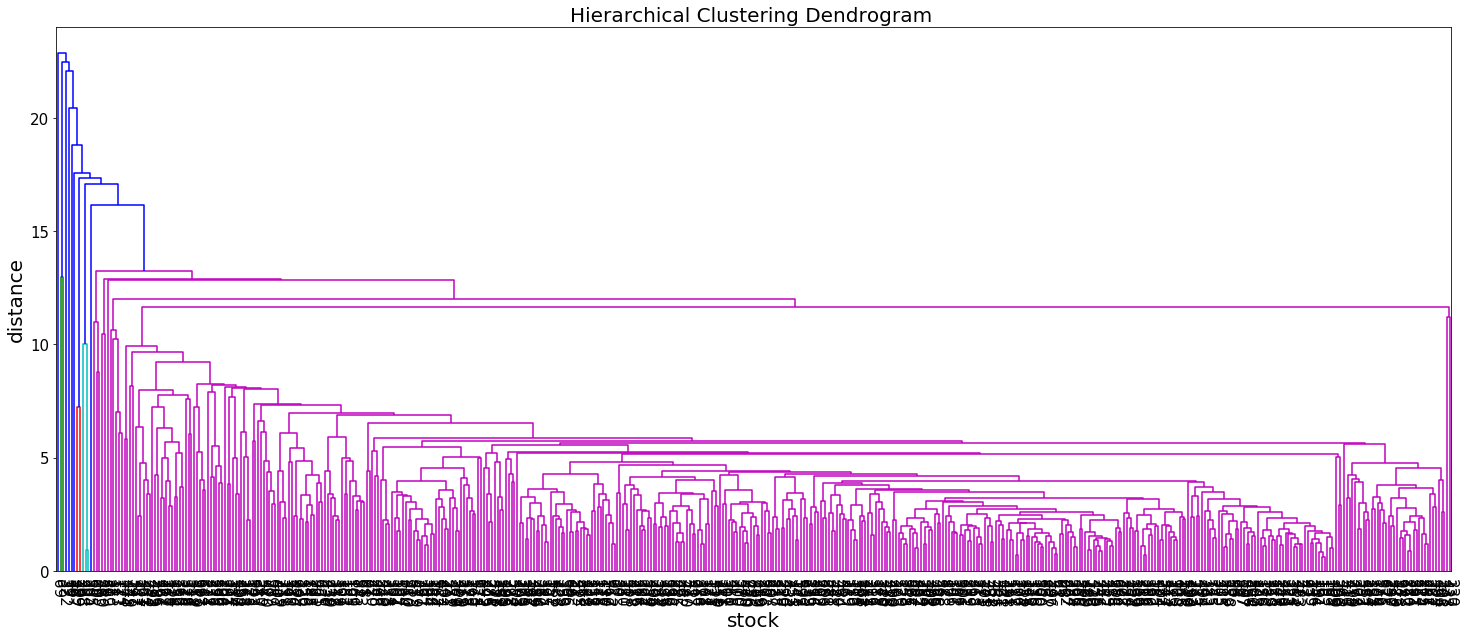

In [38]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram ', fontsize=labelsize)
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z_fund,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
plt.show()